In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [5]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
yen_futures['Returns'] = (yen_futures[["Settle"]].pct_change() * 100)
yen_futures['Returns'] = yen_futures.Returns.replace(-np.inf, np.nan)


### Lagged Returns 

In [8]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
yen_futures['Lagged_Returns']=yen_futures.Returns.shift(1)
yen_futures=yen_futures.dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Returns,Lagged_Returns
Date,,,,,,,,,,
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498.0,201486.0,0.327970,0.020502
2014-02-26,9784.0,9795.0,9746.0,9760.0,29.0,9760.0,118559.0,200105.0,-0.296251,0.327970
2014-02-27,9769.0,9831.0,9762.0,9798.0,38.0,9798.0,160638.0,201246.0,0.389344,-0.296251
2014-02-28,9787.0,9848.0,9776.0,9825.0,27.0,9825.0,169374.0,200184.0,0.275566,0.389344


### Train Test Split

In [9]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]

In [11]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train = train['Lagged_Returns'].to_frame()
X_test = test['Lagged_Returns'].to_frame()
Y_train=train['Returns']
Y_test=test['Returns']

In [12]:
print(X_train.head(5))
print(X_test.head(5))
print(Y_train.head(5))
print(Y_test.head(5))

            Lagged_Returns
Date                      
2014-02-24       -0.204604
2014-02-25        0.020502
2014-02-26        0.327970
2014-02-27       -0.296251
2014-02-28        0.389344
            Lagged_Returns
Date                      
2018-01-02        0.224871
2018-01-03        0.297285
2018-01-04       -0.240479
2018-01-05       -0.213028
2018-01-08       -0.353933
Date
2014-02-24    0.020502
2014-02-25    0.327970
2014-02-26   -0.296251
2014-02-27    0.389344
2014-02-28    0.275566
Name: Returns, dtype: float64
Date
2018-01-02    0.297285
2018-01-03   -0.240479
2018-01-04   -0.213028
2018-01-05   -0.353933
2018-01-08    0.062017
Name: Returns, dtype: float64


# Linear Regression Model

In [13]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [14]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
predictions = model.predict(X_test)

In [16]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
results = Y_test.to_frame()
results["Predicted Return"] = predictions
results.head(5)

,Returns,Predicted Return
Date,,
2018-01-02,0.297285,-0.008431
2018-01-03,-0.240479,-0.008696
2018-01-04,-0.213028,-0.006734
2018-01-05,-0.353933,-0.006834
2018-01-08,0.062017,-0.006320


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB06ABC820>,
      dtype=object)

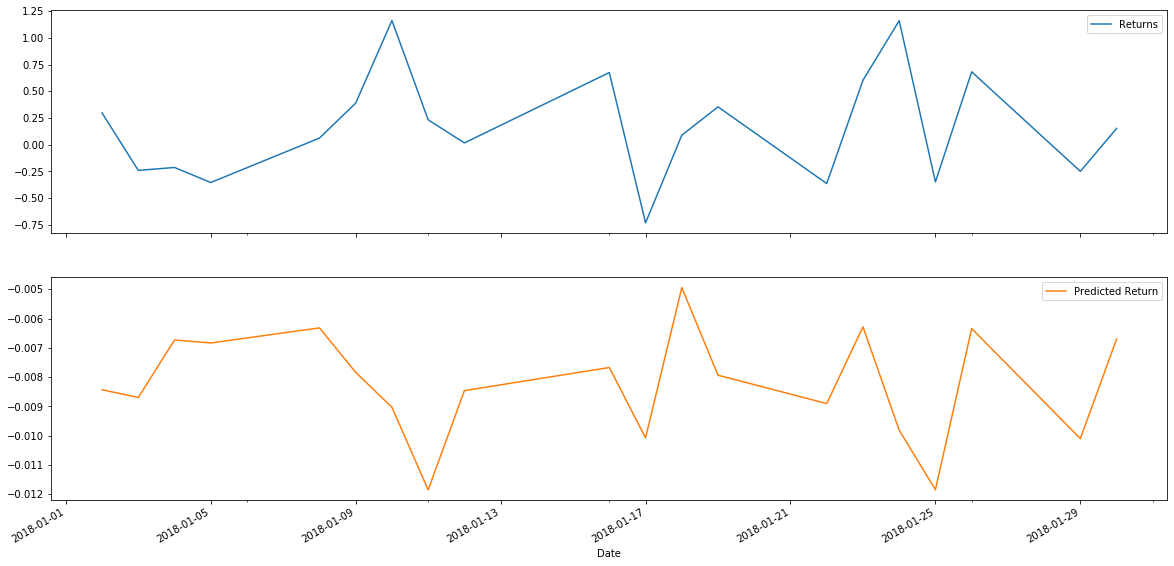

In [17]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
import warnings
warnings.filterwarnings("ignore")
results[:20].plot(subplots=True,legend='top-right',figsize=(20,10))

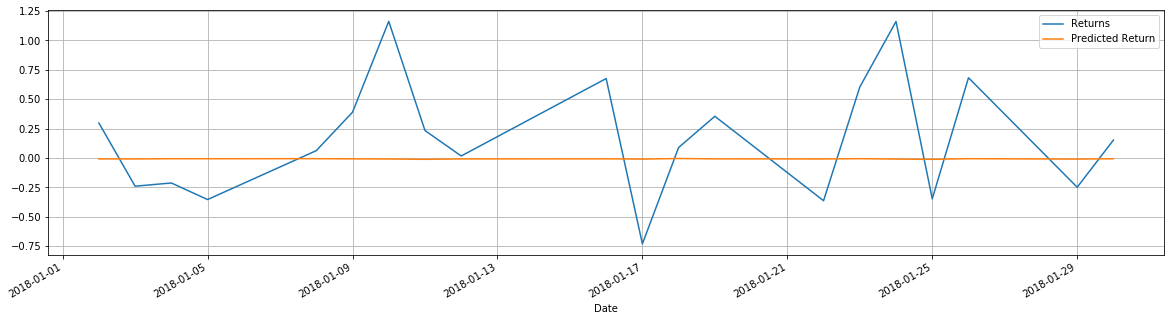

In [18]:
results[:20].plot(legend='top-right',figsize=(20,5),grid=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [19]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# YOUR CODE HERE!
mse = mean_squared_error(results["Returns"], results["Predicted Return"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.41547588962821286


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [21]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample = Y_train.to_frame()
# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample["In-sample Predictions"] = model.predict(X_train)
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse = mean_squared_error(in_sample["Returns"], in_sample["In-sample Predictions"])
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.5972597350419817


# Conclusions

YOUR CONCLUSIONS HERE!

The model preforms better for Out of Sample Data because the RMSE is lower